In [42]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
csv_path= os.path.join("Resources/lc_2016_2017.csv")
lending_club_data = pd.read_csv(csv_path, low_memory=False)

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [4]:
# Cleaning uneccesary data (pt.1)

lending_club_data.drop(['id','member_id','desc','zip_code','policy_code','addr_state','issue_d','initial_list_status','application_type'],axis=1,inplace=True)

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    759338 non-null  int64  
 1   funded_amnt                  759338 non-null  int64  
 2   funded_amnt_inv              759338 non-null  float64
 3   term                         759338 non-null  object 
 4   int_rate                     759338 non-null  float64
 5   installment                  759338 non-null  float64
 6   grade                        759338 non-null  object 
 7   sub_grade                    759338 non-null  object 
 8   emp_title                    708368 non-null  object 
 9   emp_length                   708975 non-null  object 
 10  home_ownership               759338 non-null  object 
 11  annual_inc                   759338 non-null  float64
 12  verification_status          759338 non-null  object 
 13 

In [5]:
# Cleaning uneccesary data (pt.2)

# Converting null values to 0, or None depending on the type of data

lending_club_data[['dti_joint','annual_inc_joint','il_util' , 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m' , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl' ]] = lending_club_data[['dti_joint','annual_inc_joint','il_util' , 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m' , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl']].fillna(0)


lending_club_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']] = lending_club_data[['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt']].fillna(0)

lending_club_data.verification_status_joint = lending_club_data.verification_status_joint.fillna('None')

# Converting NaN values to 0 or 1 for the following columns

lending_club_data.mths_since_last_record = lending_club_data.mths_since_last_record.apply(lambda x: 0 if pd.isna(x) else 1) 
lending_club_data.mths_since_last_major_derog = lending_club_data.mths_since_last_major_derog.apply(lambda x: 0 if pd.isna(x) else 1) 
lending_club_data.mths_since_last_delinq = lending_club_data.mths_since_last_delinq.apply(lambda x: 0 if pd.isna(x) else 1)

# Drop the following five columns

lending_club_data.drop(['next_pymnt_d' ,'last_pymnt_d','last_credit_pull_d', 'emp_title'],axis=1,inplace=True) 

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    759338 non-null  int64  
 1   funded_amnt                  759338 non-null  int64  
 2   funded_amnt_inv              759338 non-null  float64
 3   term                         759338 non-null  object 
 4   int_rate                     759338 non-null  float64
 5   installment                  759338 non-null  float64
 6   grade                        759338 non-null  object 
 7   sub_grade                    759338 non-null  object 
 8   emp_length                   708975 non-null  object 
 9   home_ownership               759338 non-null  object 
 10  annual_inc                   759338 non-null  float64
 11  verification_status          759338 non-null  object 
 12  loan_status                  759338 non-null  object 
 13 

In [6]:
# Save emp_length (Employment Length) unique values into emp_length_unique DataFrame

emp_length_unique = lending_club_data[['emp_length']].value_counts().to_frame('total')

emp_length_unique


,total
emp_length,
10+ years,257944
2 years,69494
< 1 year,62724
3 years,60843
1 year,50585
5 years,46139
4 years,45573
6 years,32616
8 years,28707


In [7]:
lending_club_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,7.593380e+05,758983.000000,759338.000000,759337.000000,759338.000000,...,7.593380e+05,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000
mean,14707.775260,14707.738385,14702.529098,13.187041,442.584639,7.996778e+04,18.980803,0.357795,0.538299,0.522341,...,3.571929e+04,60.741616,1.339469,2.847862,5789.830192,59.250400,255.295804,0.968484,1.475109,2.107288
std,9215.456493,9215.456467,9213.003636,5.054311,275.739578,1.634141e+05,13.363398,0.951763,0.838306,0.499501,...,4.324025e+04,32.390009,1.521405,2.622538,5580.483017,20.485302,2370.673461,1.484022,2.681318,2.402572
min,1000.000000,1000.000000,775.000000,5.320000,30.120000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,7500.000000,7500.000000,9.750000,241.700000,4.800000e+04,12.260000,0.000000,0.000000,0.000000,...,9.309000e+03,44.000000,0.000000,1.000000,2368.000000,46.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,12.620000,370.840000,6.700000e+04,18.180000,0.000000,0.000000,1.000000,...,2.360800e+04,69.000000,1.000000,2.000000,4416.000000,60.000000,0.000000,0.000000,0.000000,1.000000
75%,20000.000000,20000.000000,20000.000000,15.590000,590.505000,9.500000e+04,24.780000,0.000000,1.000000,1.000000,...,4.634000e+04,84.000000,2.000000,4.000000,7500.000000,74.000000,0.000000,1.000000,2.000000,3.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1719.830000,1.100000e+08,999.000000,42.000000,5.000000,1.000000,...,1.711009e+06,1000.000000,28.000000,60.000000,776843.000000,211.000000,932461.000000,48.000000,111.000000,49.000000


In [39]:
# Group by 'title' and calculate the total interest received for each product
revenue_by_product = lending_club_data.groupby('title')['total_rec_int'].sum().reset_index()

# Reset the index of the grouped DataFrame
revenue_by_product.reset_index(drop=True, inplace=True)

# Count the number of occurrences of each title in the original DataFrame
title_counts = lending_club_data['title'].value_counts().reset_index()
title_counts.columns = ['title', 'count']

# Merge the total interest received DataFrame with the title counts DataFrame based on the 'title' column
revenue_by_product = pd.merge(revenue_by_product, title_counts, on='title')


# Sort the products by total interest received in descending order
revenue_by_product.sort_values(by='total_rec_int', ascending=False, inplace=True)
revenue_by_product


# Print the products with the greatest revenue growth potential.
print("Products with the greatest revenue growth potential:")
print(revenue_by_product) 

Products with the greatest revenue growth potential:
                        title  total_rec_int   count
4          Debt consolidation   7.140551e+08  417193
3     Credit card refinancing   2.225774e+08  152348
7            Home improvement   7.694696e+07   55898
11                      Other   5.380434e+07   49953
8              Major purchase   2.139003e+07   17939
0                    Business   1.501238e+07    8000
9            Medical expenses   9.061084e+06   10128
1               Car financing   7.257998e+06    8589
6                 Home buying   5.768413e+06    3481
10      Moving and relocation   4.843524e+06    5864
12                   Vacation   3.501112e+06    6265
5                  Green loan   5.724701e+05     506
2   Credit Card Consolidation   4.344000e+02       1


In [95]:

# Define a function to calculate the risk metric
def calculate_risk(row):
    # Initialize the risk metric
    risk = 0
    
    # Check if 'acc_now_delinq' is greater than 0
    if row['acc_now_delinq'] > 0:
        risk += 1
        
    # Check if 'delinq_2yrs' is greater than 0
    if row['delinq_2yrs'] > 0:
        risk += 1
        
    # Check if 'loan_status' includes the string 'Late'
    if 'Late' in row['loan_status']:
        risk += 1
        
    return risk

# Apply the function to calculate the risk metric for each title
lending_club_data['risk_metric'] = lending_club_data.apply(calculate_risk, axis=1)

# Group by 'title' and calculate the average risk metric for each title
average_risk_by_title = lending_club_data.groupby('title')['risk_metric'].mean().reset_index()

# Sort the titles based on the average risk metric
lowest_risk_titles = average_risk_by_title.sort_values(by='risk_metric', ascending=True)



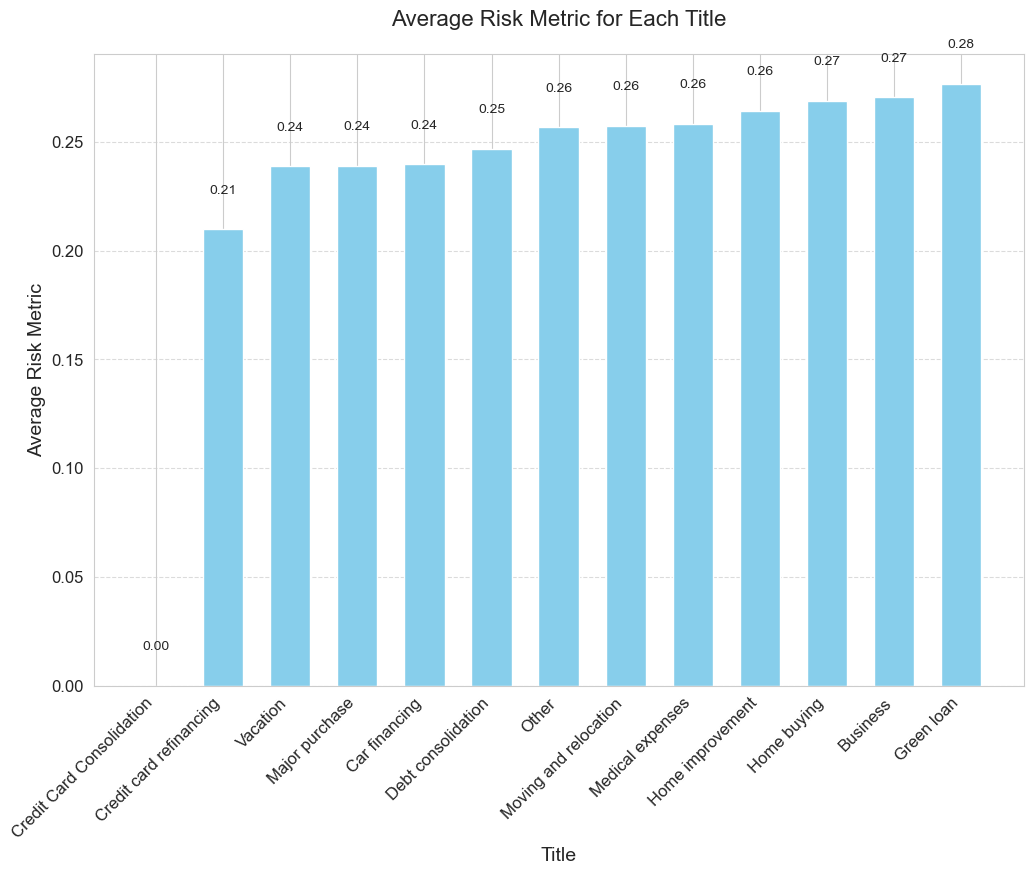

In [62]:

# Create a bar plot with customizations
plt.figure(figsize=(12, 8))  # Increase figure height
bars = plt.bar(lowest_risk_titles['title'], lowest_risk_titles['risk_metric'], color='skyblue', width=0.6)
plt.title('Average Risk Metric for Each Title', fontsize=16, pad=20)  # Increase title padding
plt.xlabel('Title', fontsize=14)
plt.ylabel('Average Risk Metric', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.015,  # Adjust the y-coordinate here
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(top=0.9)  # Adjust top margin
plt.show()



In [48]:
# Group the data by 'grade' and count the occurrences of each title
title_counts_by_grade = lending_club_data.groupby('grade')['title'].value_counts().reset_index(name='count')

# Sort the counts within each grade
title_counts_by_grade.sort_values(by=['grade', 'count'], ascending=[True, False], inplace=True)

# Select the top 5 titles for each grade
top_titles_by_grade = title_counts_by_grade.groupby('grade').head(5)

# Reset the index for readability
top_titles_by_grade.reset_index(drop=True, inplace=True)


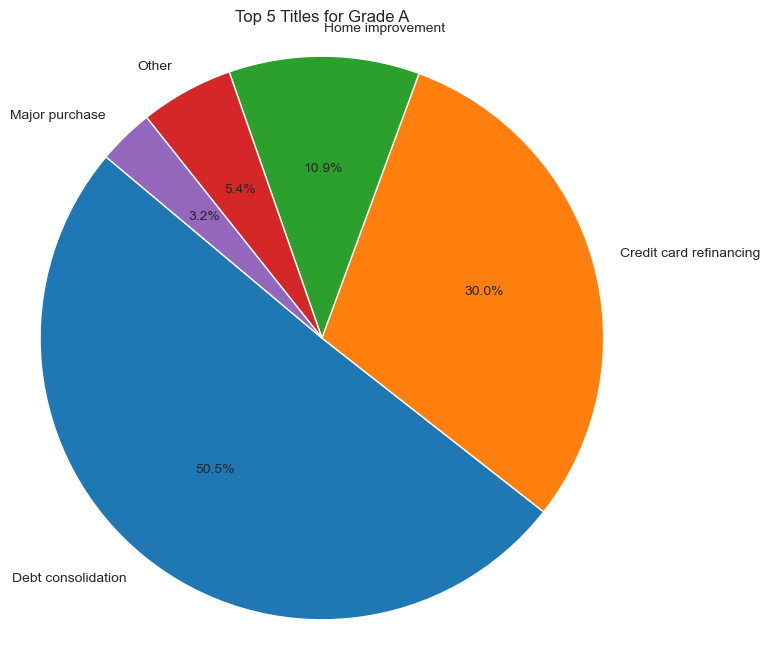

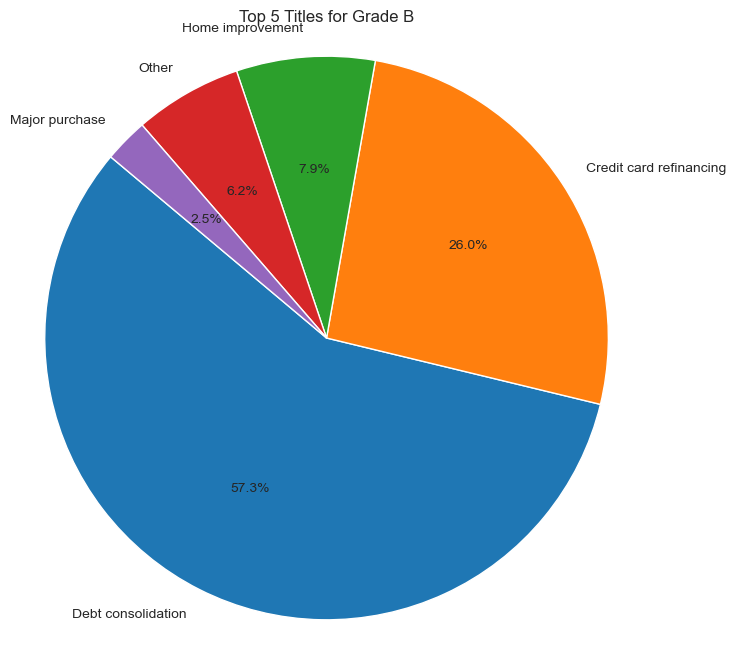

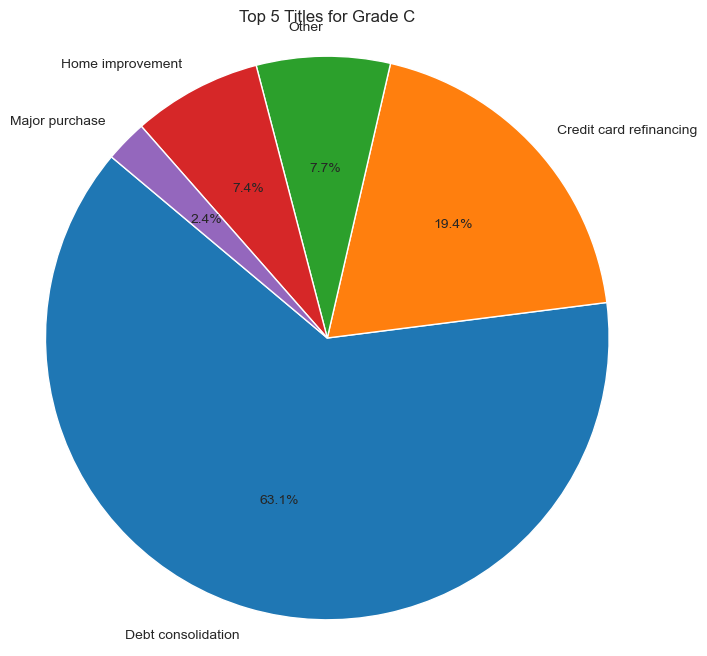

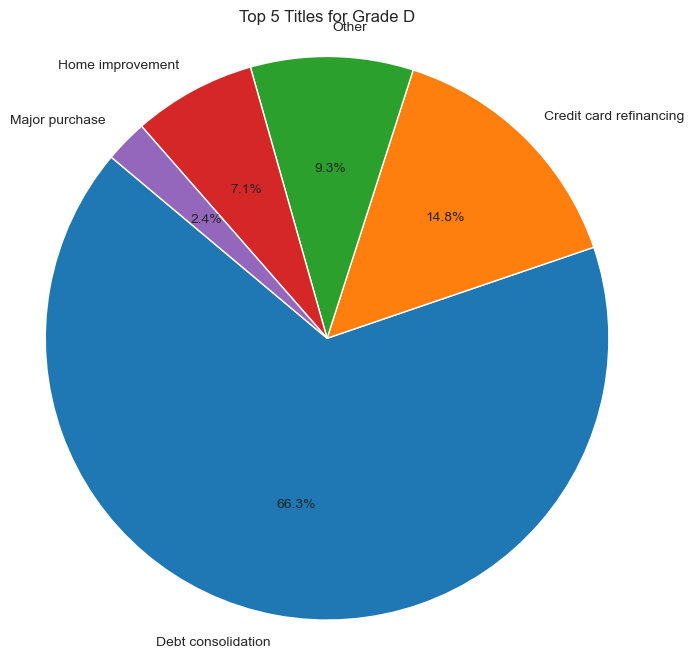

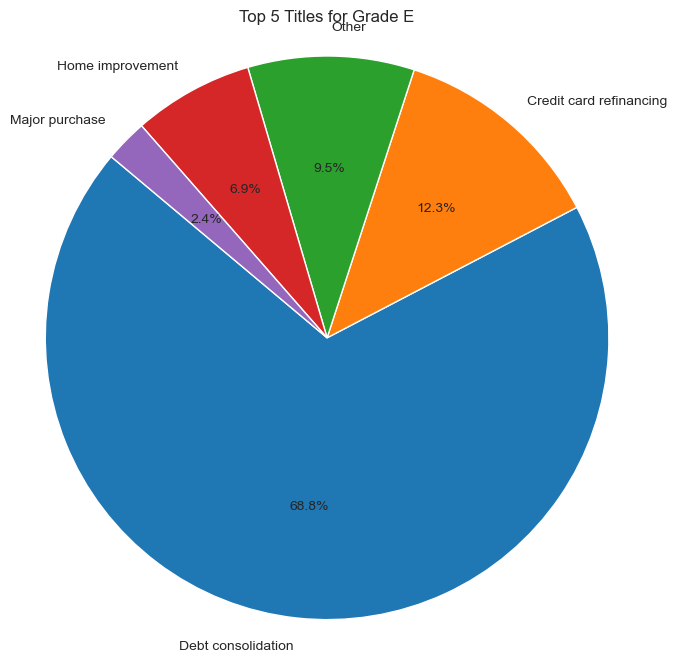

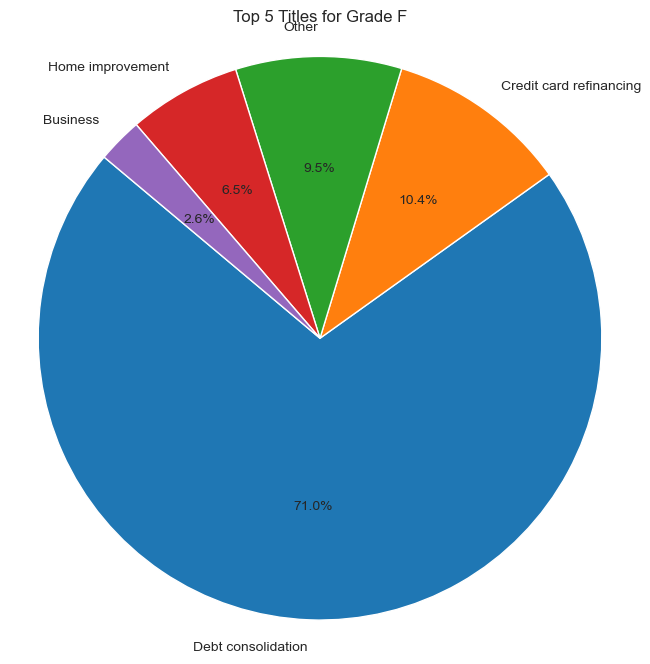

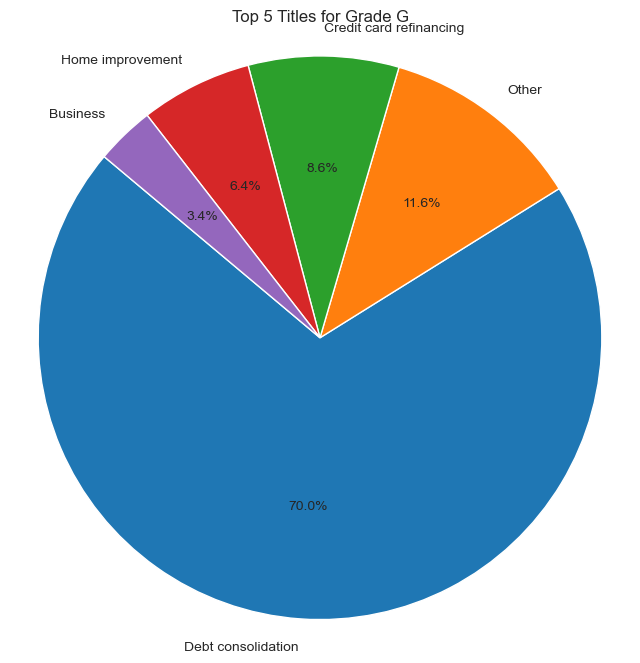

In [47]:
import matplotlib.pyplot as plt

# Group the top titles by grade
top_titles_groups = top_titles_by_grade.groupby('grade')

# Create pie plots for each grade
for grade, group_data in top_titles_groups:
    plt.figure(figsize=(8, 8))
    plt.pie(group_data['count'], labels=group_data['title'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Titles for Grade {grade}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


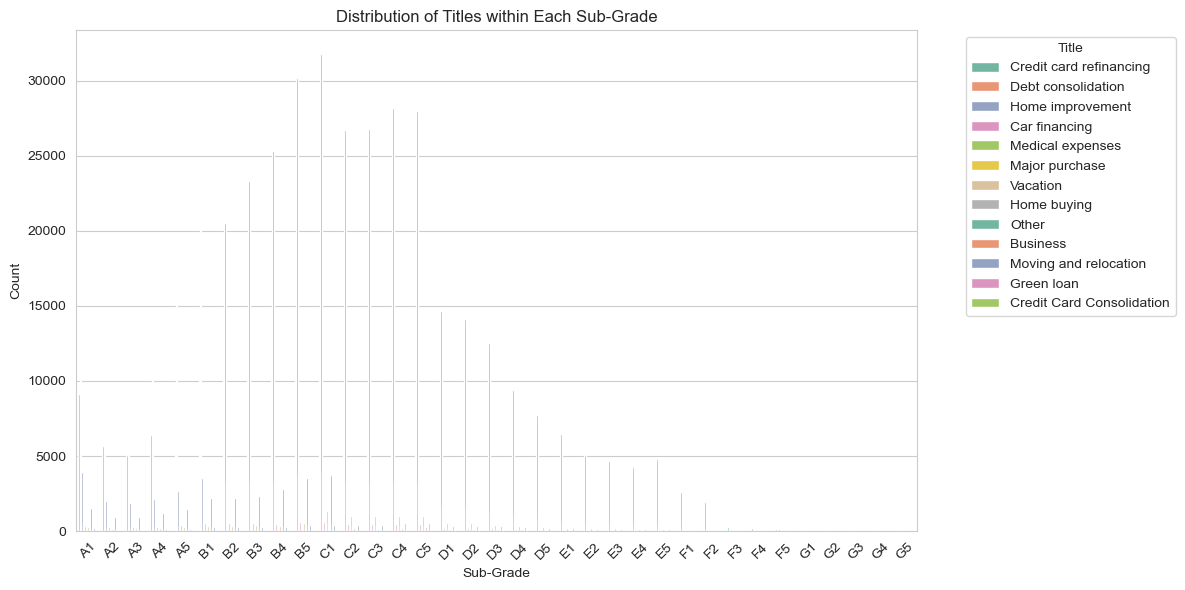

In [94]:


# Create a countplot to visualize the distribution of titles within each sub-grade
# Define the order of sub-grades
sub_grade_order = sorted(lending_club_data['sub_grade'].unique(), reverse=False)

plt.figure(figsize=(12, 6))
sns.countplot(data=lending_club_data, x='sub_grade', hue='title', palette='Set2', order=sub_grade_order)
plt.title('Distribution of Titles within Each Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


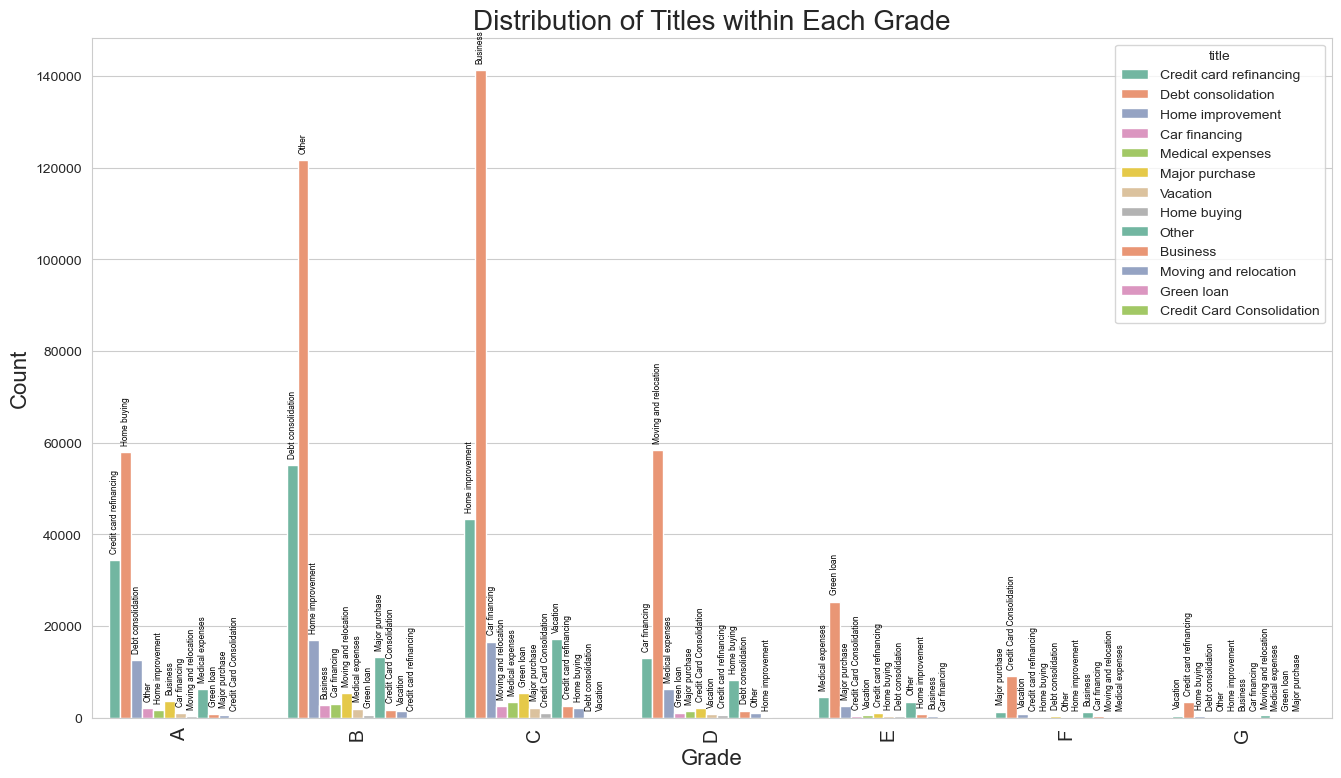

In [93]:
# Create a figure and a bar plot
plt.figure(figsize=(16, 10))
ax = sns.countplot(data=lending_club_data, x='grade', hue='title', palette='Set2', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Set title and labels
plt.title('Distribution of Titles within Each Grade', fontsize=20)
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Increase the rotation for x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=14)

# Extract unique titles from the legend
legend_labels = [l.get_text() for l in ax.get_legend().get_texts()]

# Modify the annotations to position the labels correctly
for i, p in enumerate(ax.patches):
    if p.get_height() > 0:  # Only label bars with height greater than 0
        title = legend_labels[i % len(legend_labels)]  # Cycle through unique titles
        ax.annotate(title, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=6, color='black', rotation=90,
                    xytext=(0, 5), textcoords='offset points')

# Adjust the bottom margin to prevent x-axis labels from overlapping with the axis
plt.subplots_adjust(bottom=0.2)

plt.show()





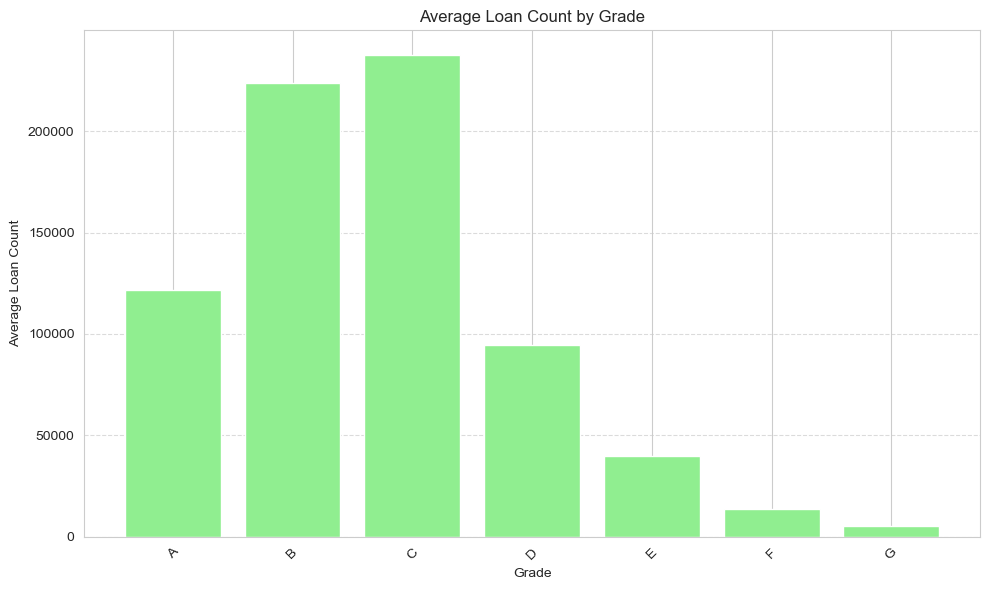

In [85]:
# Group by 'grade' and calculate the mean count of loans for each grade
average_loan_count_by_grade = lending_club_data.groupby('grade')['title'].count().reset_index()
average_loan_count_by_grade.rename(columns={'title': 'average_loan_count'}, inplace=True)
average_loan_count_by_grade['grade'] = pd.Categorical(average_loan_count_by_grade['grade'], ordered=True, categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
average_loan_count_by_grade = average_loan_count_by_grade.sort_values(by='grade')

plt.figure(figsize=(10, 6))
plt.bar(average_loan_count_by_grade['grade'], average_loan_count_by_grade['average_loan_count'], color='lightgreen')
plt.title('Average Loan Count by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Loan Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

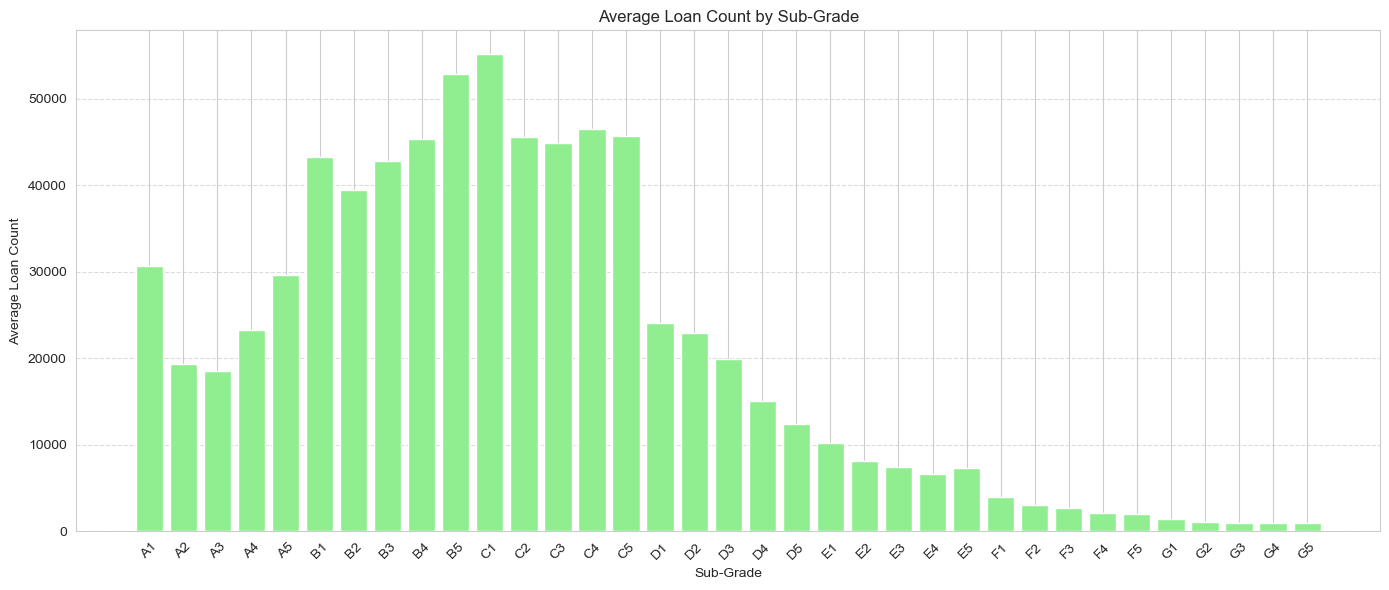

In [84]:
# Group by 'sub_grade' and calculate the mean count of loans for each sub-grade
average_loan_count_by_sub_grade = lending_club_data.groupby('sub_grade')['title'].count().reset_index()
average_loan_count_by_sub_grade.rename(columns={'title': 'average_loan_count'}, inplace=True)
average_loan_count_by_sub_grade['sub_grade'] = pd.Categorical(average_loan_count_by_sub_grade['sub_grade'], ordered=True, categories=sorted(lending_club_data['sub_grade'].unique(), reverse=True))
average_loan_count_by_sub_grade = average_loan_count_by_sub_grade.sort_values(by='sub_grade')

# Sort the DataFrame by sub-grade in descending order
average_loan_count_by_sub_grade = average_loan_count_by_sub_grade.sort_values(by='sub_grade', ascending=False)

# Create a bar plot for average loan count by sub-grade
plt.figure(figsize=(14, 6))
plt.bar(average_loan_count_by_sub_grade['sub_grade'], average_loan_count_by_sub_grade['average_loan_count'], color='lightgreen')
plt.title('Average Loan Count by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Average Loan Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()